In [74]:
import pandas as pd
import numpy as np

In [75]:
team_stats_path = '../data/external/NBA_team_stats_1979-2024.csv'
player_stats_path = '../data/external/NBA_player_stats_1979-2024.csv'

team_stats = pd.read_csv(team_stats_path, header=1)
player_stats = pd.read_csv(player_stats_path)

team_stats = team_stats[['Season', 'Team', 'W/L%']]
player_stats.columns = player_stats.columns.str.replace('%', '')

In [76]:
team_stats.head()

,Season,Team,W/L%
0,2015-16,GSW,.890
1,1995-96,CHI,.878
2,1996-97,CHI,.841
3,2016-17,GSW,.817
4,2015-16,SAS,.817


In [77]:
player_stats.head()

,Rk,Player,WS,MP/G,Season,Age,Team,G,GS,AS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,Pos,Player-additional
0,1,Michael Jordan,21.2,40.4,1987-88,24,CHI,82,82.0,1,...,4.8,10.7,7.8,27.0,3.9,2.4,9.6,34.1,G-F,jordami01
1,2,Michael Jordan,20.4,37.7,1995-96,32,CHI,82,82.0,1,...,5.6,14.9,10.2,21.2,3.1,1.0,8.4,33.3,G-F,jordami01
2,3,Michael Jordan,20.3,37.0,1990-91,27,CHI,82,82.0,1,...,4.6,14.3,9.5,25.2,3.7,1.7,8.7,32.9,G-F,jordami01
3,4,LeBron James,20.3,37.7,2008-09,24,CLE,81,81.0,1,...,4.3,19.0,11.9,38.0,2.4,2.4,11.0,33.8,F-G,jamesle01
4,5,David Robinson,20.0,40.5,1993-94,28,SAS,80,80.0,1,...,8.8,20.3,14.8,21.6,2.3,5.4,10.9,32.0,C,robinda01


In [78]:
N = 8
player_metrics = ['PER', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']
#player_metrics = ['PER', 'ORB%']

In [79]:
final_data = []

# Process each season and team
for (season, team), group in player_stats.groupby(['Season', 'Team']):
    # Sort players by a criterion, e.g., minutes played (assuming 'MP' column exists)
    top_players = group.sort_values(by='MP/G', ascending=False).head(N)
    
    # Create a dictionary to hold the data for this team-season
    team_data = {'Season': season, 'Team': team}
    
    # Add team stats
    team_stats_row = team_stats[(team_stats['Season'] == season) & (team_stats['Team'] == team)]
    if not team_stats_row.empty:
        team_data.update(team_stats_row.iloc[0].to_dict())
    
    # Add player metrics
    for i, player in enumerate(top_players.itertuples(), start=1):
        for metric in player_metrics:
            team_data[f'Player{i}_{metric}'] = getattr(player, metric) if hasattr(player, metric) else player._asdict().get(metric, 0)
    
    # Fill missing player slots with zeros if less than N players
    for i in range(len(top_players) + 1, N + 1):
        for metric in player_metrics:
            team_data[f'Player{i}_{metric}'] = 0
    
    # Append the team data to the list
    final_data.append(team_data)


In [80]:
final_data_df = pd.DataFrame(final_data)
final_data_df = final_data_df.dropna(subset=['W/L%'])
final_data_df

,Season,Team,W/L%,Player1_PER,Player1_ORB,Player1_DRB,Player1_AST,Player1_STL,Player1_BLK,Player1_TOV,...,Player7_STL,Player7_BLK,Player7_TOV,Player8_PER,Player8_ORB,Player8_DRB,Player8_AST,Player8_STL,Player8_BLK,Player8_TOV
0,1979-80,ATL,.610,18.0,3.9,4.3,23.5,2.2,0.5,12.2,...,2.0,0.1,16.2,14.2,7.0,15.1,9.0,1.6,0.8,13.0
3,1979-80,BOS,.744,20.5,8.3,23.6,18.5,2.3,1.0,14.0,...,1.3,0.4,15.2,12.7,3.9,4.8,19.0,2.0,0.8,19.9
5,1979-80,CHI,.366,17.0,5.4,6.7,25.9,1.8,0.4,19.5,...,1.0,1.5,24.8,12.3,3.7,8.1,15.6,1.8,0.9,14.5
8,1979-80,CLE,.451,19.1,7.4,15.2,4.9,1.1,1.5,9.5,...,1.0,2.3,11.7,10.4,10.5,17.8,5.1,1.6,1.7,12.6
11,1979-80,DEN,.366,22.2,8.2,17.5,10.7,1.4,1.0,8.7,...,1.2,0.3,11.9,16.7,10.7,15.9,10.9,3.1,0.8,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,2023-24,POR,.256,15.9,1.5,10.9,27.6,0.7,0.3,12.1,...,1.9,1.7,14.9,13.0,9.4,25.0,6.2,1.2,1.2,10.2
2374,2023-24,SAC,.561,20.1,2.8,11.8,25.2,2.7,1.1,10.1,...,0.7,1.5,9.7,12.0,3.6,10.8,11.1,2.5,2.7,13.0
2375,2023-24,SAS,.268,15.7,1.3,11.3,19.1,1.5,0.8,8.6,...,0.8,0.4,12.2,10.6,3.1,12.2,9.3,1.6,2.4,11.4
2376,2023-24,TOR,.305,19.5,7.3,18.9,26.2,1.7,3.7,13.6,...,4.3,2.6,4.5,4.9,15.1,24.1,2.4,1.4,3.3,7.9


In [81]:
final_data_df.to_csv('../data/interim/NBA_team_player_stats.csv', index=False)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
data_path = '../data/interim/NBA_team_player_stats.csv'
data = pd.read_csv(data_path)

In [84]:
X = data.drop(columns=['W/L%', 'Season', 'Team'])
y = data['W/L%']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression - MSE: 0.0088, R²: 0.5362


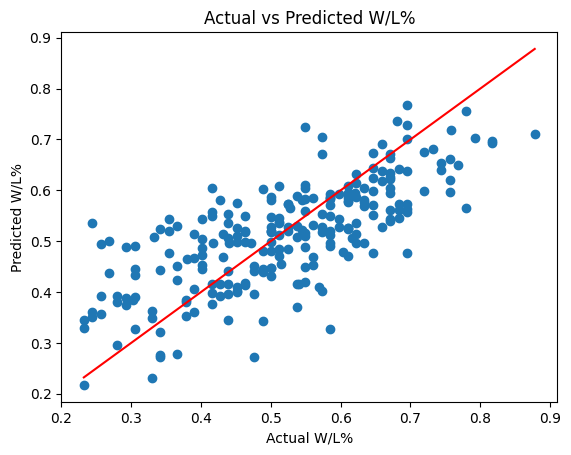

In [89]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual W/L%')
plt.ylabel('Predicted W/L%')
plt.title('Actual vs Predicted W/L%')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

Feature Importance:
        Feature  Coefficient
0   Player1_PER     0.058839
7   Player2_PER     0.048839
14  Player3_PER     0.047892
21  Player4_PER     0.031685
42  Player7_PER     0.026941
28  Player5_PER     0.026650
50  Player8_ORB     0.015004
5   Player1_BLK     0.014568
35  Player6_PER     0.013519
4   Player1_STL     0.012319
49  Player8_PER     0.011092
36  Player6_ORB     0.010281
12  Player2_BLK     0.009565
48  Player7_TOV     0.008486
13  Player2_TOV     0.007766
55  Player8_TOV     0.007049
26  Player4_BLK     0.006853
2   Player1_DRB     0.006674
33  Player5_BLK     0.006251
25  Player4_STL     0.004824
18  Player3_STL     0.004382
39  Player6_STL     0.003877
10  Player2_AST     0.003471
24  Player4_AST     0.003324
23  Player4_DRB     0.003104
20  Player3_TOV     0.002638
6   Player1_TOV     0.002443
32  Player5_STL     0.001971
46  Player7_STL     0.001868
37  Player6_DRB     0.001696
15  Player3_ORB     0.001662
47  Player7_BLK     0.001361
3   Player1_AST     0.0

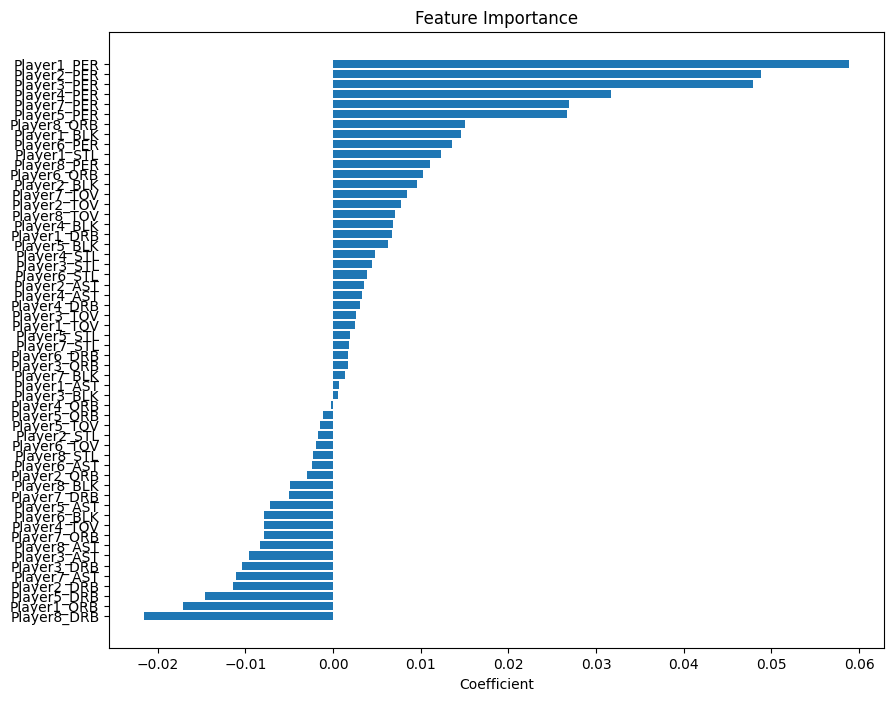

In [90]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()